# ** Ciência dos Dados - Trabalho**

**Idh, Democracia e Assassinatos por 100 mil**

Utilizando os dados de Idh, nível de democracia e assassinatos relativos, deseja-se descobrir **Como índice de democracia de um país influencia o seu Idh e seu número relativo de assassinatos**

Primeiro fazemos as importações das bibliotecas pandas e matplotlib.

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

Depois, temos que colocar os arquivos de excel em dataframes.

In [40]:
idh=pd.read_excel('IDH.xlsx')
ass=pd.read_excel('Assassinatos.xlsx')
dem=pd.read_excel('Democracia.xlsx')

idh.head()

,IDH,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533


Assim que criamos os dataframes, precisamos escolher um ano para analisar os dados. O ano de 2005 é uma boa escolha, já que é um
ano recente e que tem a maioria dos dados das três tabelas.

In [41]:
idh_2005 = idh.loc[:,['IDH',2005]]
ass_2005 = ass.loc[:,['Assassinatos',2005]]
dem_2005 = dem.loc[:,['Democracia',2005]]

idh_2005.head()

,IDH,2005
0,Afghanistan,0.405
1,Albania,0.696
2,Algeria,0.686
3,Andorra,NaN
4,Angola,0.439


Já escolhido o ano, precisa-se excluir os índices numéricos a esquerda das três tabelas.

In [42]:
idh_idx=idh_2005.set_index('IDH')
ass_idx=ass_2005.set_index('Assassinatos')
dem_idx=dem_2005.set_index('Democracia')


idh_idx.head()

,2005
IDH,
Afghanistan,0.405
Albania,0.696
Algeria,0.686
Andorra,NaN
Angola,0.439


Após isso, precisamos excluir de nossa análise os países sem dados.

In [43]:
idh_nan=idh_idx.dropna()
ass_nan=ass_idx.dropna()
dem_nan=dem_idx.dropna()

idh_nan.head()

,2005
IDH,
Afghanistan,0.405
Albania,0.696
Algeria,0.686
Angola,0.439
Antigua and Barbuda,0.773


Depois precisamos juntar os três dataframes.

In [44]:
ia = idh_nan.join(ass_nan, how='inner', lsuffix='_IDH', rsuffix='_Assassinatos')
ia.head()

,2005_IDH,2005_Assassinatos
Afghanistan,0.405,3.84
Albania,0.696,7.33
Algeria,0.686,4.39
Angola,0.439,48.20
Antigua and Barbuda,0.773,7.49


In [45]:
iad=ia.join(dem_nan, how='inner')

iad.head()


,2005_IDH,2005_Assassinatos,2005
Albania,0.696,7.33,9.0
Algeria,0.686,4.39,2.0
Angola,0.439,48.20,-2.0
Argentina,0.782,5.25,8.0
Armenia,0.692,2.35,5.0


Por fim, a função 'join', apenas pode juntar duas colunas para definir seus sufixos; então, para definir corretamente o nome das
colunas, devemos utilizar 'columns'.

In [46]:
iad.columns=['2005_IDH','2005_Assassinatos','2005_Democracia']

iad.head()

,2005_IDH,2005_Assassinatos,2005_Democracia
Albania,0.696,7.33,9.0
Algeria,0.686,4.39,2.0
Angola,0.439,48.20,-2.0
Argentina,0.782,5.25,8.0
Armenia,0.692,2.35,5.0


democracia plena(10)
democracia (6-9)
Anocracia(1-5)
Anocracia fechada(-5-0)
#autocracia(-10-60)

Agora temos que substituir os números da variável qualitativa '2005_Democracia' pelos seguintes dados de correlação encontrados no site https://www.systemicpeace.org/polity/polity4.htm:

Full Democracy..........(10)
Democracy..............(6,9)
Anocracy...............(1,5)
Closed Anocracy.......(-5,0)
Autocracy...........(-10,-6)

Para fazer essa substituição, criamos uma função 'classificacao', que vai fazer esse processo.

In [47]:
def classificacao(x):
    if x==10:
        return 'Full Democracy'
    elif x>=6:
        return 'Democracy'
    elif x>=1:
        return 'Anocracy'
    elif x>=(-5):
        return 'Closed Anocracy'
    else:
        return 'Autocracy'

In [48]:
dem_cla=iad['2005_Democracia'].apply(classificacao)

dem_cla.head()

Albania            Democracy
Algeria             Anocracy
Angola       Closed Anocracy
Argentina          Democracy
Armenia             Anocracy
Name: 2005_Democracia, dtype: object

Depois de criarmos uma nova coluna, utilizando a função criada, temos que juntá-la no dataframe completo, utilizando novamente o 'join'.

In [49]:
new_iad=ia.join(dem_cla,how='inner')

new_iad.head()

,2005_IDH,2005_Assassinatos,2005_Democracia
Albania,0.696,7.33,Democracy
Algeria,0.686,4.39,Anocracy
Angola,0.439,48.20,Closed Anocracy
Argentina,0.782,5.25,Democracy
Armenia,0.692,2.35,Anocracy


Depois de juntarmos novamente o dataframe, devemos mudar a coluna '2005_Democracia' para ser lida como uma variável qualitativa, utilizando o método 'astype'

In [50]:
new_iad['2005_Democracia']=new_iad['2005_Democracia'].astype('category')

new_iad['2005_Democracia'].value_counts(True)*100

Democracy          37.179487
Full Democracy     21.153846
Closed Anocracy    16.666667
Autocracy          14.102564
Anocracy           10.897436
Name: 2005_Democracia, dtype: float64

Para poder gerar um gráfico que gere de maneira intuitiva os dados apresentados, utilizamos o 'plt.scatter', para gerar um gráfico em que a cor dos pontos varia de azul até vermelho, sendo mais democraticos os azuis e menos os vermelhos. A posição x dos pontos representa o número de assassinatos relativo e a posição y representa o IDH do país.

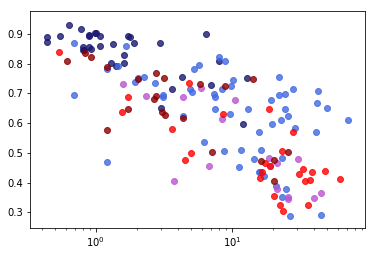

In [51]:
sistemas=['Full Democracy', 'Democracy', 'Anocracy', 'Closed Anocracy', 'Autocracy']

cores=['#191970','#4169E1','#BA55D3','red','#8B0000']

for r in range(5):
    dat=new_iad[new_iad['2005_Democracia']==sistemas[r]]
    cor=cores[r]
    plt.scatter(dat['2005_Assassinatos'],dat['2005_IDH'], c=cor, alpha=0.8)
    plt.xscale('log')


Agora que conseguimos construir um gráfico que correlaciona as três variáveis, agora tentaremos descobrir uma melhor relação entre o número de assassinatos relativos e o Idh, para isso, usaremos uma função de log que conseguirá correlacionar melhor os dados.

In [52]:
import math

def log(x):
    return math.log10(x)

Usaremos essa função criada para deixar todos os elementos da coluna '2005_Assassinatos' como logs de base 10.

In [53]:
ass_log=new_iad['2005_Assassinatos'].apply(log)

ass_log.head()

Albania      0.865104
Algeria      0.642465
Angola       1.683047
Argentina    0.720159
Armenia      0.371068
Name: 2005_Assassinatos, dtype: float64

Agora achamos um coeficiente de relação de -0.75 fazendo a correlação dos dados (lembrando que os dados de assassinatos estão em log)

In [54]:
ass_log.corr(new_iad['2005_IDH'])

-0.7485099077916744

Para gerar a reta de tendência, fazemos uma função que plotará tanto os dados em si, como também a reta de tendência.

In [55]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('Assassinatos relativos por IDH')
    plt.xlabel('IDH')
    plt.ylabel('Assassinatos')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()

Agora podemos ver a reta, que como esperado, se comporta de maneira decrescente, ou seja: Os países com maior Idh tem um menor número de assassinatos relativos, enquanto os países com Idhs mais baixos tendem a ter um maior número de assassinatos relativo.

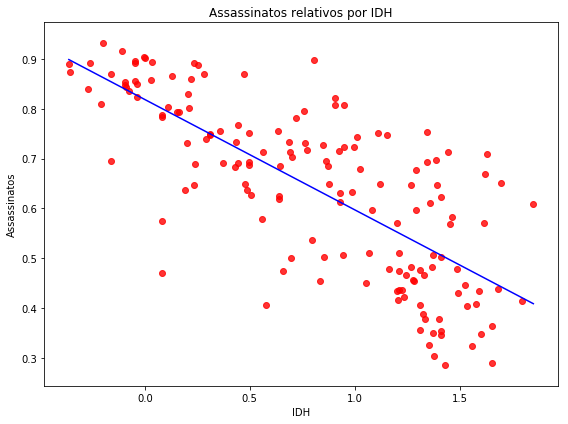

In [56]:
reta(ass_log,new_iad['2005_IDH'] )

Agora o objetivo é tentar relacionar os Idhs dos países com os regimes a que pertencem, já que a plotagem dos dados relacionando as três variáveis não mostrou muita relação entre esses dados.

Para isso, como um contato inicial, vamos tentar relacionar as médias dos Idhs dos países pertencentes a cada sistema. Isso será feito a partir de um dicionário que contenha os dados e assim conseguir transformá-lo em um dataframe.

In [57]:
medias={'Sistema':sistemas,'IDH':[]}


for r in range(5):
    fram=new_iad[new_iad['2005_Democracia']==sistemas[r]]
    med=fram['2005_IDH'].mean()
    print(med)
    medias['IDH'].append(med)
    

    
    
df = pd.DataFrame(data=medias)

df=df.set_index('Sistema')
df.head()



    

0.8364848484848487
0.6276034482758621
0.5087647058823529
0.4945769230769231
0.6617727272727273


,IDH
Sistema,
Full Democracy,0.836485
Democracy,0.627603
Anocracy,0.508765
Closed Anocracy,0.494577
Autocracy,0.661773


Fazendo isso, podemos plotar um gráfico com essas informações, porém ele não indica evoluções temporais e só indica que sistemas mais democráticos tem um melhor Idh, com excessão dos autocráticos, que tem um nível comparado ao de democracias.

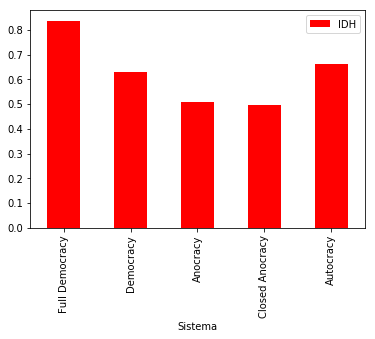

In [58]:
df.plot.bar(color=['red'])

Para melhorar a análise, podemos utilizar uma análise temporal de 10 anos, de 1996 até 2005. Fazemos isso utilizando os mesmos processos já usados para trabalhar com dataframes.

In [59]:
list_columns=[0,7,8,9,10,11,12,13,14,15,16]

idh_10 = idh.iloc[:,[0,7,8,9,10,11,12,13,14,15,16]]
dem_10 = dem.iloc[:,[0,197,198,199,200,201,202,203,204,205,206]]

dem_10.head()

,Democracia,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
0,Afghanistan,-7.0,-7.0,-7.0,-7.0,-7.0,NaN,NaN,NaN,NaN,NaN
1,Albania,0.0,5.0,5.0,5.0,5.0,5.0,7.0,7.0,7.0,9.0
2,Algeria,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,2.0,2.0
3,Angola,-2.0,-3.0,-3.0,-3.0,-3.0,-3.0,-2.0,-2.0,-2.0,-2.0
4,Argentina,7.0,7.0,7.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0


In [60]:
idh_10n=idh_10.dropna()
dem_10n=dem_10.dropna()

idh_10n.head()

,IDH,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
0,Afghanistan,0.328,0.332,0.335,0.338,0.340,0.341,0.373,0.381,0.396,0.405
1,Albania,0.637,0.636,0.646,0.656,0.662,0.670,0.674,0.681,0.685,0.696
2,Algeria,0.609,0.617,0.627,0.636,0.644,0.653,0.663,0.673,0.680,0.686
6,Argentina,0.738,0.746,0.753,0.764,0.771,0.776,0.770,0.775,0.780,0.782
7,Armenia,0.609,0.618,0.632,0.639,0.644,0.645,0.657,0.668,0.679,0.692


In [61]:
idh_10i=idh_10n.set_index('IDH')
dem_10i=dem_10n.set_index('Democracia')

idh_10i.head()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
IDH,,,,,,,,,,
Afghanistan,0.328,0.332,0.335,0.338,0.340,0.341,0.373,0.381,0.396,0.405
Albania,0.637,0.636,0.646,0.656,0.662,0.670,0.674,0.681,0.685,0.696
Algeria,0.609,0.617,0.627,0.636,0.644,0.653,0.663,0.673,0.680,0.686
Argentina,0.738,0.746,0.753,0.764,0.771,0.776,0.770,0.775,0.780,0.782
Armenia,0.609,0.618,0.632,0.639,0.644,0.645,0.657,0.668,0.679,0.692


In [62]:
for e in range(1996,2006):
    dem_10i[e]=dem_10i[e].apply(classificacao)

dem_10i.head()

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
Democracia,,,,,,,,,,
Albania,Closed Anocracy,Anocracy,Anocracy,Anocracy,Anocracy,Anocracy,Democracy,Democracy,Democracy,Democracy
Algeria,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Anocracy,Anocracy
Angola,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy
Argentina,Democracy,Democracy,Democracy,Democracy,Democracy,Democracy,Democracy,Democracy,Democracy,Democracy
Armenia,Autocracy,Autocracy,Anocracy,Anocracy,Anocracy,Anocracy,Anocracy,Anocracy,Anocracy,Anocracy


In [63]:
for e in range(1996,2006):
    dem_10i[e]=dem_10i[e].astype('category')
    
dem_10i[1996].value_counts()


Democracy          46
Autocracy          39
Full Democracy     29
Closed Anocracy    26
Anocracy           20
Name: 1996, dtype: int64

In [64]:
di=idh_10i.join(dem_10i,how='inner',lsuffix='_idh',rsuffix='_democracia')

di.head()

,1996_idh,1997_idh,1998_idh,1999_idh,2000_idh,2001_idh,2002_idh,2003_idh,2004_idh,2005_idh,1996_democracia,1997_democracia,1998_democracia,1999_democracia,2000_democracia,2001_democracia,2002_democracia,2003_democracia,2004_democracia,2005_democracia
Albania,0.637,0.636,0.646,0.656,0.662,0.670,0.674,0.681,0.685,0.696,Closed Anocracy,Anocracy,Anocracy,Anocracy,Anocracy,Anocracy,Democracy,Democracy,Democracy,Democracy
Algeria,0.609,0.617,0.627,0.636,0.644,0.653,0.663,0.673,0.680,0.686,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Closed Anocracy,Anocracy,Anocracy
Argentina,0.738,0.746,0.753,0.764,0.771,0.776,0.770,0.775,0.780,0.782,Democracy,Democracy,Democracy,Democracy,Democracy,Democracy,Democracy,Democracy,Democracy,Democracy
Armenia,0.609,0.618,0.632,0.639,0.644,0.645,0.657,0.668,0.679,0.692,Autocracy,Autocracy,Anocracy,Anocracy,Anocracy,Anocracy,Anocracy,Anocracy,Anocracy,Anocracy
Australia,0.888,0.891,0.894,0.897,0.899,0.902,0.905,0.908,0.910,0.915,Full Democracy,Full Democracy,Full Democracy,Full Democracy,Full Democracy,Full Democracy,Full Democracy,Full Democracy,Full Democracy,Full Democracy


Para poder analisar a média dos Idhs de cada sistema ao longo dos 10 anos, precisamos criar um dicionário que contenha o nome dos sistemas e a média de seus Idhs.

In [65]:
lista_dataframes={'Anos':range(1996,2006)}

for s in sistemas:
    lista_dataframes[s]=[]
    for d in range(10,20):
        year=str(d+1986)
        demo_year=year+'_democracia'
        idh_year=year+'_idh'
        
        sep=di[di[demo_year]==s][idh_year]
        
        lista_dataframes[s].append(sep.mean())
    
    
    
print(lista_dataframes)

{'Anos': range(1996, 2006), 'Full Democracy': [0.8003103448275865, 0.8020333333333333, 0.8088666666666666, 0.8148387096774197, 0.8202580645161289, 0.826225806451613, 0.8296249999999997, 0.8351250000000001, 0.8386250000000001, 0.8440000000000002], 'Democracy': [0.6100714285714286, 0.6152857142857141, 0.6237317073170733, 0.628048780487805, 0.6324772727272726, 0.63868085106383, 0.641127659574468, 0.6454130434782608, 0.6396938775510204, 0.6390600000000002], 'Anocracy': [0.49800000000000005, 0.5369999999999999, 0.538, 0.5159444444444444, 0.5031764705882352, 0.46913333333333335, 0.45057142857142857, 0.4765333333333333, 0.49225, 0.5216923076923077], 'Closed Anocracy': [0.5055263157894738, 0.4871904761904763, 0.49495652173913046, 0.4780909090909092, 0.4827272727272728, 0.4969090909090909, 0.4988095238095238, 0.5020000000000001, 0.49960000000000004, 0.5101363636363636], 'Autocracy': [0.5518064516129033, 0.5540666666666668, 0.5611481481481482, 0.59475, 0.606909090909091, 0.6173333333333334, 0.62

Depois disso, podemos transformar esse dicionário em um dataframe usando "pd.DataFrame.from_dict"

In [66]:
di_10=pd.DataFrame.from_dict(lista_dataframes)

di_10.head()

,Anocracy,Anos,Autocracy,Closed Anocracy,Democracy,Full Democracy
0,0.498000,1996,0.551806,0.505526,0.610071,0.800310
1,0.537000,1997,0.554067,0.487190,0.615286,0.802033
2,0.538000,1998,0.561148,0.494957,0.623732,0.808867
3,0.515944,1999,0.594750,0.478091,0.628049,0.814839
4,0.503176,2000,0.606909,0.482727,0.632477,0.820258


In [67]:
di_10=di_10[['Anos','Full Democracy','Democracy','Anocracy','Closed Anocracy','Autocracy']]

di_10.head(10)

,Anos,Full Democracy,Democracy,Anocracy,Closed Anocracy,Autocracy
0,1996,0.800310,0.610071,0.498000,0.505526,0.551806
1,1997,0.802033,0.615286,0.537000,0.487190,0.554067
2,1998,0.808867,0.623732,0.538000,0.494957,0.561148
3,1999,0.814839,0.628049,0.515944,0.478091,0.594750
4,2000,0.820258,0.632477,0.503176,0.482727,0.606909
5,2001,0.826226,0.638681,0.469133,0.496909,0.617333
6,2002,0.829625,0.641128,0.450571,0.498810,0.626136
7,2003,0.835125,0.645413,0.476533,0.502000,0.632545
8,2004,0.838625,0.639694,0.492250,0.499600,0.642739
9,2005,0.844000,0.639060,0.521692,0.510136,0.672632


In [68]:
di_10.set_index('Anos')

,Full Democracy,Democracy,Anocracy,Closed Anocracy,Autocracy
Anos,,,,,
1996,0.800310,0.610071,0.498000,0.505526,0.551806
1997,0.802033,0.615286,0.537000,0.487190,0.554067
1998,0.808867,0.623732,0.538000,0.494957,0.561148
1999,0.814839,0.628049,0.515944,0.478091,0.594750
2000,0.820258,0.632477,0.503176,0.482727,0.606909
2001,0.826226,0.638681,0.469133,0.496909,0.617333
2002,0.829625,0.641128,0.450571,0.498810,0.626136
2003,0.835125,0.645413,0.476533,0.502000,0.632545
2004,0.838625,0.639694,0.492250,0.499600,0.642739


Por fim, plotamos esses dados, usando o "scatter"

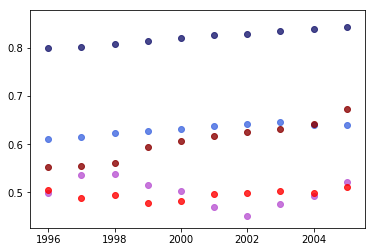

In [69]:
for r in range(5):
    cor=cores[r]
    
    ana=new_iad[new_iad['2005_Democracia']==sistemas[r]]
    plt.scatter(di_10['Anos'],di_10[sistemas[r]], c=cor, alpha=0.8)

# ** Conclusão**

**Idh e Assassinatos:**
    
A relação entre o Idh e o número de assassinatos é muito clara. Um país em que há pouco desenvolvimento escolar, médico e trabalhista desfavorece as relações de cooperação entre os seres humanos, gerando situações em que os indivíduos acompanham desde pequenos uma vida de violência e criminalidade, o que favorece a entrada dos mesmos nesse mesmo mundo, assim aumentando roubos e assassinatos. Essa associação foi ainda mais corroborada quando vemos uma correlação de 75% entre esses dados, o que permite uma análise, não só sociológica, como também analitica das consequências da falta de desenvolvimento humano em um país.

**Democracia e Idh:**

A relação entre o Idh e a democracia não é tão explicita e portanto deve ser feita cautelosamente. 

Os países classificados como "Full Democracy", são países com um período de existência de intermediário a alto e que foram e são líderes em desenvolvimento tecnológico e social e que portanto conseguiram desenvolver-se gerando altos índices de Idh (o que também os impede de aumentar em uma taxa alta seus respectivos Idhs.

Os países classificados como "Democracy", são mais variados e incluem países que estão em constante desenvolvimento e aqueles que sofrem graves crises. Esses países tem um desenvolvimento bom e suas associações com países desenvolvidos os fazem ter um bom Idh.

Tanto os países classificados como "Anocracy" e como "Closed Anocracy", são países frágeis politicamente, economicamente e militarmente falando, o que não permite que se desenvolvam adequadamente, gerando estagnações e dependência de ajudas externas.

Por fim, os países classificados como "Autocracy", apesar de serem sistemas totalmente antidemocráticos, diferentemente daqueles classificados como "Anocracy" e "Autocracy", eles Tem uma centralidade política e também tem um bom nível de militarização, além do que a economia de vários deles são baseadas em petróleo e outras fontes de energia fósseis, assim eles tem uma crescente mais alta até do que os classificados como "Full Democracy".

# **Extra**

Com essa análise pudemos concluir que a melhor opção para o futuro do Brasil é a volta da família real e também da Petrobras.